<a href="https://colab.research.google.com/github/swimbikerun96/Thinkful-Projects/blob/master/Comprehensive_Python_for_Data_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Reverse string function
def reverse_string(s):
  return s[::-1]

reverse_string('FORWARD')

'DRAWROF'

In [0]:
#Data Exploration and Analysis
!pip install seaborn==0.9.0

from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

postgres_user = 'dabc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'bitcoinhistoricaldata'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

bitcoin_df = pd.read_sql_query('SELECT  bf.id, bf.open, bf.high, bf.low, bf.close, bf.volume_btc, bf.volume_currency, bf.weighted_price, bf.timestamp FROM bitflyer AS bf INNER JOIN bitstamp AS bs ON bs.id = bf.id INNER JOIN coinbase AS cb ON cb.id = bf.id INNER JOIN coincheck AS cc ON cc.id = bf.id;', con=engine)

In [0]:
engine.dispose()

bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 9 columns):
id                 65499 non-null int64
open               65499 non-null float64
high               65499 non-null float64
low                65499 non-null float64
close              65499 non-null float64
volume_btc         65499 non-null float64
volume_currency    65499 non-null float64
weighted_price     65499 non-null float64
timestamp          65499 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 4.5 MB


In [0]:
bitcoin_df[['volume_btc', 'volume_currency', 'weighted_price']].describe()

,volume_btc,volume_currency,weighted_price
count,6.549900e+04,6.549900e+04,65499.000000
mean,1.073116e+01,3.461883e+06,323862.068703
std,1.449195e+01,4.658998e+06,68490.605444
min,3.400000e-07,9.952650e-02,206375.000000
25%,2.081150e+00,6.441020e+05,284977.000000
50%,6.101950e+00,1.951220e+06,302362.000000
75%,1.357185e+01,4.405600e+06,366460.500000
max,3.138670e+02,1.012510e+08,498097.000000


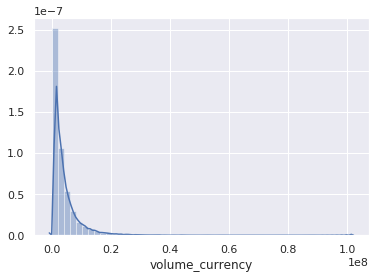

In [0]:
ax = sns.distplot(bitcoin_df['volume_currency'])

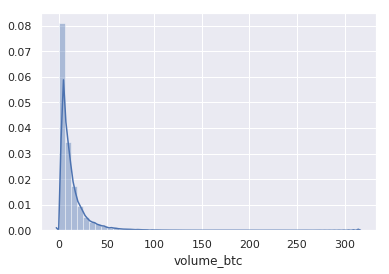

In [0]:
ax = sns.distplot(bitcoin_df['volume_btc'])

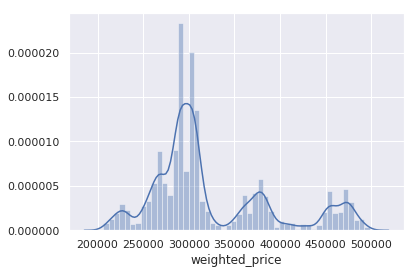

In [0]:
ax = sns.distplot(bitcoin_df['weighted_price'])

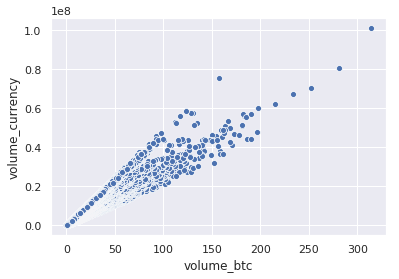

In [0]:
sns.scatterplot(x = 'volume_btc', y = 'volume_currency', data=bitcoin_df)

In [0]:
#There is a clear positive correlation that exists between the volume of bitcoin and currency in general. As other currencies increase in circulation, so does bitcoin. 